In [164]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.text import OffsetFrom

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_data = pd.read_csv(city_data_to_load, encoding="utf-8")
ride_data = pd.read_csv(ride_data_to_load, encoding="utf-8")

# Combine the data into a single dataset
combined_df = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
combined_df.sort_values('fare', inplace=True, ascending=True) 
combined_df.head()


,city,date,fare,ride_id,driver_count,type
1586,North Barbara,2018-03-24 06:49:11,4.05%,5344060775757,18,Urban
517,West Josephberg,2018-02-19 20:48:16,4.07%,1348027294873,45,Urban
1358,Erikaland,2018-03-24 09:50:04,4.07%,6561682951720,37,Urban
1239,Royland,2018-01-15 08:50:46,4.10%,9409233443225,64,Urban
806,Reynoldsfurt,2018-03-10 20:10:03,4.10%,5690725376594,67,Urban


## Bubble Plot of Ride Sharing Data

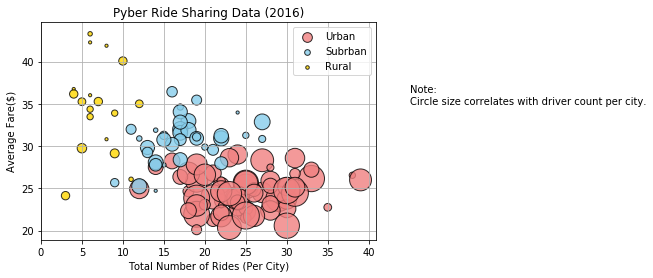

In [165]:
# Obtain the x and y coordinates for each of the three city types
#create df with average fair and number of rides per city by ride_id
ride_count_avfare = pd.DataFrame({"Number of Rides" : combined_df.groupby("city")["ride_id"].count(),
                                  "Average Fare" : combined_df.groupby("city")["fare"].mean()
                                 })
#add in type with merge by city
ride_count_avfare = pd.merge(ride_count_avfare, city_data, on="city")
#ride_count_avfare

#groupedCombinedDF
urban_data = ride_count_avfare.loc[ride_count_avfare["type"] == "Urban"]
suburban_data = ride_count_avfare[ride_count_avfare["type"] == "Suburban"]
rural_data = ride_count_avfare[ride_count_avfare["type"] == "Rural"]
#urban_data.head()
#suburban_data.head()
#rural_data.head()

# Build the scatter plots for each city types
plt.scatter(urban_data["Number of Rides"], urban_data["Average Fare"], s=urban_data["driver_count"]*10, color = "lightcoral", alpha=0.8, edgecolors="black", linewidth=1)
plt.scatter(suburban_data["Number of Rides"], suburban_data["Average Fare"], s=suburban_data["driver_count"]*10, color = "skyblue", alpha=0.8, edgecolors="black", linewidth=1)
plt.scatter(rural_data["Number of Rides"], rural_data["Average Fare"], s=rural_data["driver_count"]*10, color = "gold", alpha=0.8, edgecolors="black", linewidth=1)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xticks(np.arange(0, 41, 5))
plt.yticks(np.arange(20, 41, 5))
plt.grid(b=None, which='major', axis='both')

# Create a legend
plt.legend(labels=["Urban", "Subrban", "Rural"], loc="best", markerscale=.5)

# Incorporate a text label regarding circle size
plt.text(45, 35, "Note:\nCircle size correlates with driver count per city.", fontdict=None, withdash=False)
#plt.text(60, 60, "Note:\nCircle size correlates with driver count per city.", fontdict=None, withdash=False, horizontalalignment='center', verticalalignment='center')
#plt.text(20, 150, "Note:"\"Circle size correlates with driver count per city.", fontsize=18, clip_on=True)
#style='oblique', ha='center', va='top', wrap=True

# Save Figure
plt.savefig('Pyber 2016 Ride Sharing Data.png', bbox_inches="tight")

# Show Figure
plt.show()


## Total Fares by City Type

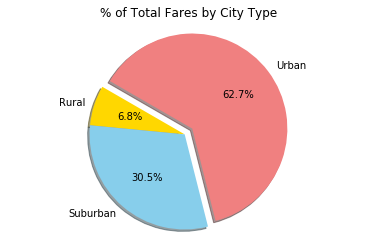

In [166]:
# Calculate Type Percents
total_fares = combined_df['fare'].sum()
#print(total_fares)
pd.options.display.float_format = '{:,.2f}%'.format 
ride_fare_city = pd.DataFrame({" " : (combined_df.groupby("type")["fare"].sum()/total_fares)*100})
#index=['Urban', 'Rural', 'Suburban']
ride_fare_city.head()

# Build Pie Chart
# Tell matplotlib to create a pie chart based upon the above data
explode = (0, 0, 0.1)
colors = ["gold","skyblue","lightcoral"]
type = ["Rural", "Suburban", "Urban"]

plot = ride_fare_city.plot.pie(y=' ', explode=explode, labels=type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plot.get_legend().remove()
plot.set_title("% of Total Fares by City Type")
# Save Figure
plt.savefig("% of Total Fares by City Type.png")
# Show Figure
plt.show()

## Total Rides by City Type

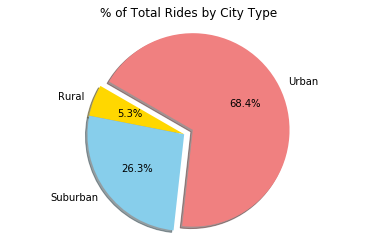

In [167]:
# Calculate Ride Percents
total_rides = combined_df['ride_id'].count()
#print(total_rides)

pd.options.display.float_format = '{:,.2f}%'.format 
ride_rides_city = pd.DataFrame({" " : (combined_df.groupby("type")["ride_id"].count()/total_rides)*100})
ride_rides_city.head()

# Build Pie Chart
explode = (0, 0, 0.1)
colors = ["gold","skyblue","lightcoral"]
type = ["Rural", "Suburban", "Urban"]

plot = ride_rides_city.plot.pie(y=' ', explode=explode, labels=type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plot.get_legend().remove()
plot.set_title("% of Total Rides by City Type")

# Save Figure
plt.savefig("% of Total Rides by City Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

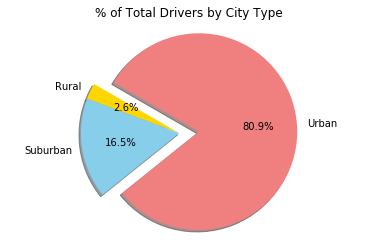

In [168]:
# Calculate Driver Percents

total_drivers = city_data['driver_count'].sum()
#print(total_drivers)
pd.options.display.float_format = '{:,.2f}%'.format
ride_driver_city = pd.DataFrame({" " : (city_data.groupby("type")["driver_count"].sum()/total_drivers)*100})
ride_driver_city.head()
total_drivers

# Build Pie Chart
explode = (0, 0, 0.2)
colors = ["gold","skyblue","lightcoral"]
type = ["Rural", "Suburban", "Urban"]

plot = ride_driver_city.plot.pie(y=' ', explode=explode, labels=type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plot.get_legend().remove()
plot.set_title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("% of Total Drivers by City Type.png")

# Show Figure
plt.show()


In [169]:
#Export a text file with the results
file = open("Uber Analysis.txt","w")
file.write("Uber Analysis"'\n'"--------------"'\n'
           "The four plots indicate that:"'\n'
           "1.  The highest average fare resides with the Suburban city type, despite having less rides."'\n'
           "2.  Rural cities have the lowest number of rides, but have the highest average fares."'\n'
           "3.  There are more Urban drivers than percentage of rides, while there are less percentages of Suburban and"'\n' 
           "    Rural drivers in comparison to percentage of rides in those city types."'\n'
          )
file.close()